# **Importing the Dataset**

We are using the Credit Card Fraud Detection dataset from kaggle (https://www.kaggle.com/datasets/kartik2112/fraud-detection)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (
    train_test_split,
    RepeatedStratifiedKFold,
    cross_validate
)

from sklearn.metrics import (
    classification_report,
    roc_curve,
    roc_auc_score,
    auc,
    precision_recall_curve,
    RocCurveDisplay
)

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from imblearn.ensemble import (
    RUSBoostClassifier, 
    EasyEnsembleClassifier
)

%matplotlib inline

***Importing the Dataset***.The default dataset from Kaggle have been separated into train and test dataset. We have combined the train and test set together and renamed it to fraud.csv for ease of the project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datadir='/content/drive/My Drive/Data/DS/'

Mounted at /content/drive


In [ ]:
data =pd.read_csv(datadir+'fraud.csv') 
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


The dataset comprised of **22 columns** and over **1.8 million rows**.The "**is_fraud**" column is the **target** we are trying to predict, "0" as non-fraud and "1" as fraud.

The other columns are the **features** which we will analyse in more detail using EDA and using feature selections/engineering to select the features to be used for the ML modeling.

For ease of reference for the columns' names, the following are the breakdown and details of the respective features/columns:


trans_date_trans_time -> Transaction time stamp

cc_num -> Credit card number

merchant -> merchant name

category -> transaction category

amt -> Transaction amount

first -> First name of card holder

last -> Last name of card holder

gender -> Sex of card holder

street -> transaction address

city -> transaction city

state -> transaction state

zip -> transaction zipcode

lat -> transaction lattitude

long -> transaction longitude

city_pop -> Population of the city

job -> job of the card holder

dob -> date of birth of card holder

trans_num -> transaction number of transaction

unix_time -> time in unix format

merch_lat -> lattitude of the merchant

merch_long -> longitude of merchant

is_fraud -> nature of transaction (fraud or not fraud)

# **Data Pre-processing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

We can see that there are 12 columns that are categorical, which may require some data transformation. Columns such as 'trans_date_trans_time' may require additional data preprocessing by using the python dt function.

Let's try to see unique elements of the dataset

In [ ]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

It seems that there are alot of elements under the **'trans_date_trans_time', 'trans_num', 'unix_time', 'merch_lat' and 'merch_long'**. We will perform some data pre-processing on these columns as well as each individual column to find more information of it. We will first split the **'trans_date_trans_time'** column into smaller columns such as ***date, day, hour, week and year*** so that it will be easier to perform data analysis on, and to see if we are able to find any meaningful patterns on the data in relation with our target.

In [ ]:
from datetime import datetime, timedelta 


data["year"] = pd.DatetimeIndex(data["trans_date_trans_time"]).year.astype(int).astype(str)
data["hour"] = pd.DatetimeIndex(data["trans_date_trans_time"]).hour
data["month"] = pd.DatetimeIndex(data["trans_date_trans_time"]).month
data['day']=pd.to_datetime(data['trans_date_trans_time']).dt.dayofweek
data['week']=pd.to_datetime(data['trans_date_trans_time']).dt.week

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,hour,month,day,week
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,0,1,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,0,1,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,0,1,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,0,1,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,0,1,1,1


Here, we have separated the **'trans_date_trans_time'** column into 5 new columns: **'year', 'hour', 'month', 'week', and 'day'** using the python date/time dt function. Instead of showing all the date/time details in one column, it is better that we have separated them out into the 5 new columns, which will be easier for us to work on and look deeper onto the data.

Since we have separated the 'trans_date_trans_time' column into 5 new columns, we will drop this column from the datatset.

In [ ]:
data.drop(['trans_date_trans_time'] , axis=1, inplace=True)
data.head(3)

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,hour,month,day,week
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,0,1,1,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,0,1,1,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,0,1,1,1


We observed that the '**dob**' column is also showing date/month/year altogether.  It will be better if we can get just get the age of the customer for our data processing later. It'll also be easier for us to do further analysis and even feature selection.

Lets use the dt python function again for the '**dob**' column to derive a new column **'age'**.

In [ ]:
import datetime as dt

data['age']=dt.date.today().year-pd.to_datetime(data['dob']).dt.year
print(data['age'])

0          34
1          44
2          60
3          55
4          36
           ..
1852389    56
1852390    23
1852391    41
1852392    57
1852393    29
Name: age, Length: 1852394, dtype: int64


Since we have created a new '**age**' column from the 'dob' column, we will drop the '**dob**' column.

We will also drop the column "**Unnamed: 0**" as does not contain any usuable data for our model training. 

In [ ]:
data.drop(['dob', 'Unnamed: 0'] , axis=1, inplace=True)
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,year,hour,month,day,week,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1325376018,36.011293,-82.048315,0,2019,0,1,1,1,34
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1325376044,49.159047,-118.186462,0,2019,0,1,1,1,44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1325376051,43.150704,-112.154481,0,2019,0,1,1,1,60
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1325376076,47.034331,-112.561071,0,2019,0,1,1,1,55
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1325376186,38.674999,-78.632459,0,2019,0,1,1,1,36


We can start to observe that there are some distintive pattern in the data, such as what are the most transacted fraud amount under "amt", the imbalance under "is_fraud", the time when the transaction occured, and even some merchants and cities were repeated from the dataset/

We will delve deeper into each of the feature to analyse and understand them better.


Data Preprocessing is very important before performing any form of ML training. Messy and unclean data will affect the results from the ML model and eventually the ability of our ML model to predict the result accurately.

Lets check if there are any **null** values and drop any **duplicate** rows of data in the dataset

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
year          0
hour          0
month         0
day           0
week          0
age           0
dtype: int64

Let's look at our **Target** column and see what is the distribution of fraud vs non-fraud. We will also rename the target **'0' as non-fraud and '1' as fraud**, since our label is in 0 or 1 and not string.

In [ ]:
data.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [ ]:
data.is_fraud.value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

***Results***: Here, we can see that **99.479%** of the 'is_fraud' target column are **non-fraud '0'** and **0.521% are fraud '1'**.  The data is **skewed** at 99.479% towards the non-fraud data. We will need to be mindful to consider this when evaluating our trained model.

This also tells us that the 'is_fraud' target column data is **highly imbalanced**, which we will need to perform data imbalance technique which will be discussed under Feature Engineering to address this issue.

# **EDA**

Now that we have performed some data pre-processing of the columns we wanted, lets perform some **EDA** to further analyse the dataset to understand it better, and try to find any meaningful patterns and relationship between the features and target which we can use for the training of our ML model.

Let's try to go through each of the feature of the dataset and analyse it in detail.

**1) 'category' column**

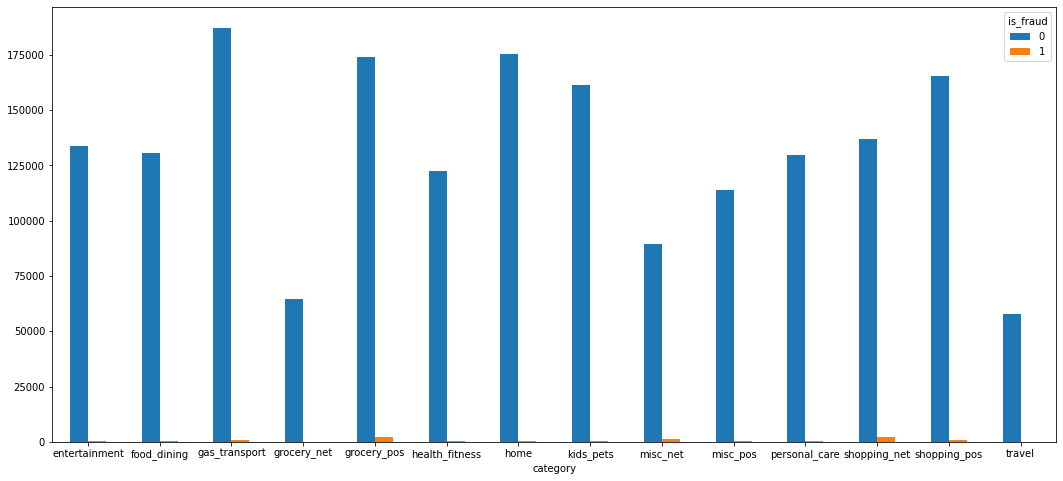

In [ ]:
crosstb = pd.crosstab(data.category, data.is_fraud)
barplot = crosstb.plot.bar(rot=0, figsize=(18,8))

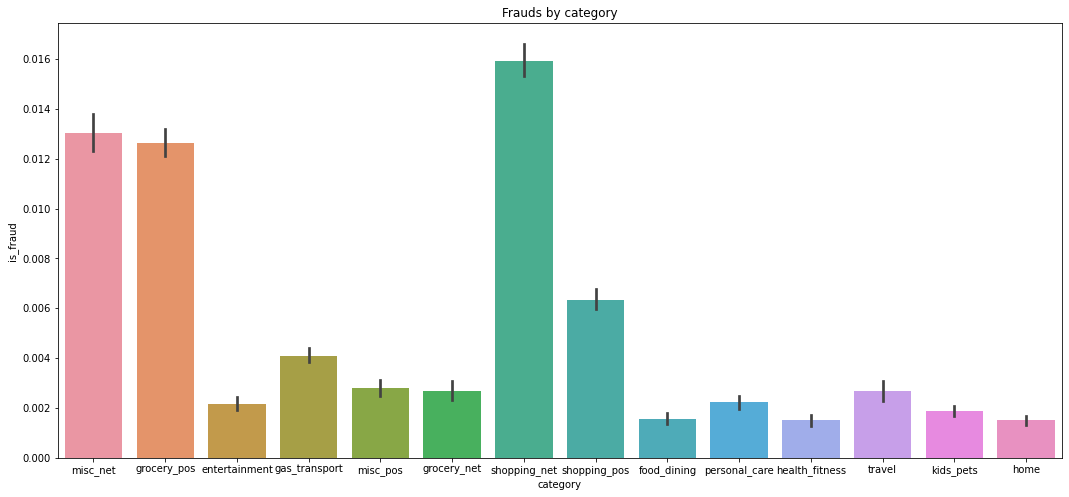

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Frauds by category')
sns.barplot(x="category", y='is_fraud' ,data=data)

In [ ]:
df = pd.crosstab(data["category"],data["is_fraud"],normalize='index')
df

is_fraud,0,1
category,,
entertainment,0.997823,0.002177
food_dining,0.998432,0.001568
gas_transport,0.995894,0.004106
grocery_net,0.997303,0.002697
grocery_pos,0.987355,0.012645
health_fitness,0.998490,0.001510
home,0.998490,0.001510
kids_pets,0.998120,0.001880
misc_net,0.986961,0.013039


***Results***: When we plot the **category vs the target 'is_fraud'**, it seems that **shopping_net, misc_net and grocery_pos** has the highest incident of frauds ("1") vs all other categories. This tells us that there are indeed certain categories that are more susceptible to fraud. We can use it for our feature selection later on for our training.

However, we will need to encode the data first before we can perform any training on it.

Next, we look at the "amt" column to see what are the most common amount that are fraud.

**2) Amount**

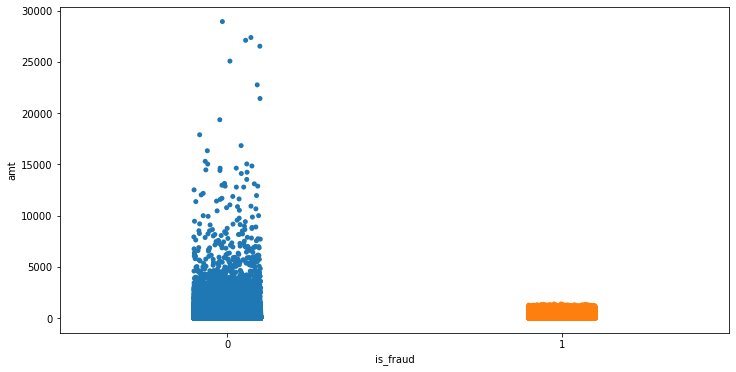

In [ ]:
plt.figure(figsize=(12,6))
sns.stripplot( x = data['is_fraud'], y= data['amt'], data=data)
#takes about a min to run

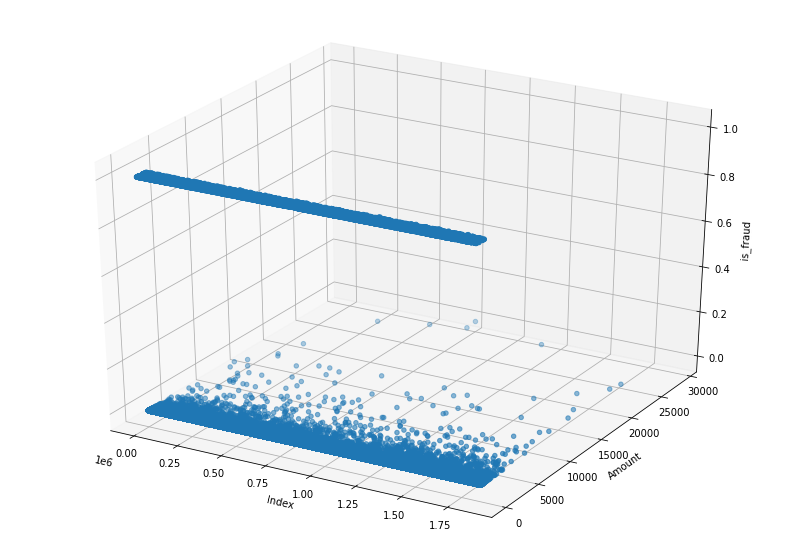

In [ ]:
td = plt.figure(figsize=(14,10)).gca(projection='3d')
td.scatter(data.index, data['amt'], data['is_fraud'])
td.set_xlabel('Index')
td.set_ylabel('Amount')
td.set_zlabel('is_fraud')
plt.show()

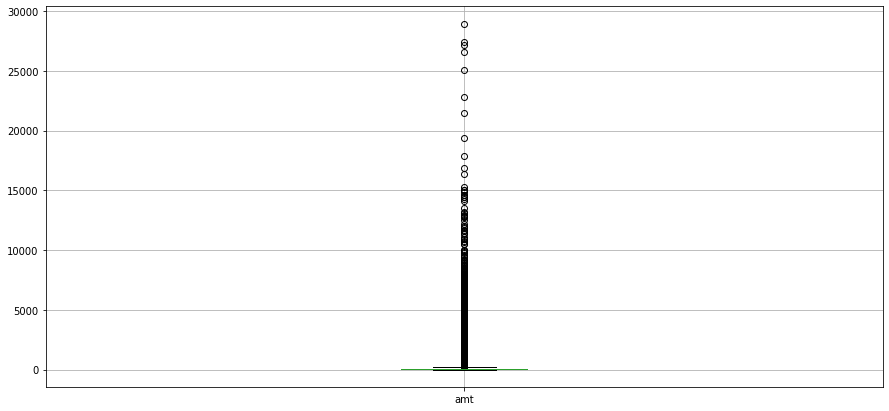

In [ ]:
boxplot = data.boxplot(column=['amt'],figsize=(15,7))

There are some outliers showing large amount of over 15000 to about 30000.

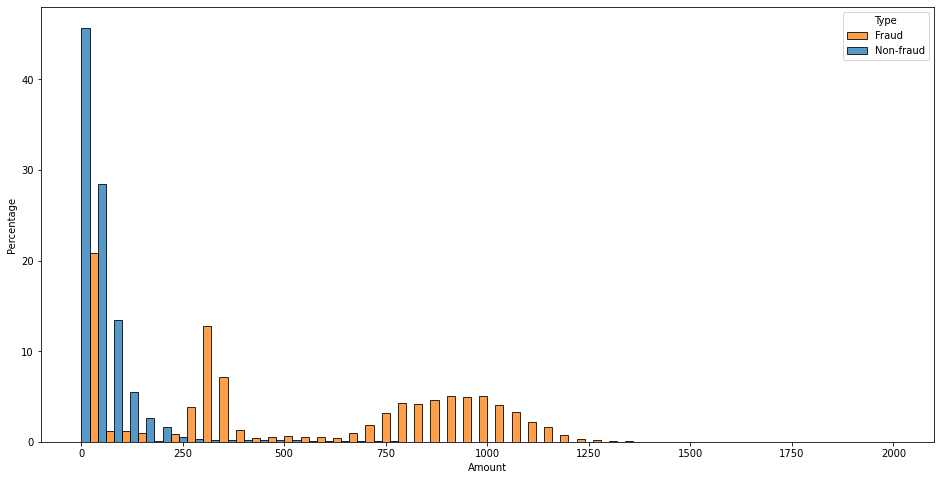

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.histplot(x='amt',data=data[data.amt<=2000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=50)
ax.set_ylabel('Percentage')
ax.set_xlabel('Amount')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

In [ ]:
print( data[ (data['amt'] < 1250) & (data['amt'] > 500)==1 ].value_counts())


cc_num               merchant                              category       amt      first     last     gender  street                        city           state  zip    lat      long       city_pop  job                          trans_num                         unix_time   merch_lat  merch_long   is_fraud  year  hour  month  day  week  age
60416207185          fraud_Barrows PLC                     shopping_pos   596.78   Mary      Diaz     F       9886 Anita Drive              Fort Washakie  WY     82514  43.0048  -108.8964  1645      Information systems manager  26dba4c955a404db219e6769e6018e72  1363357941  42.040994  -109.024833  0         2020  14    3      6    11    36     1
4128027264554082     fraud_Jewess LLC                      shopping_pos   863.03   Kyle      Park     M       7507 Larry Passage Suite 859  Mount Perry    OH     43760  39.8788  -82.1880   1831      Barrister's clerk            9d191aae14eb5124a0ca394eddc9fc25  1340343491  39.947928  -81.717548   0         201

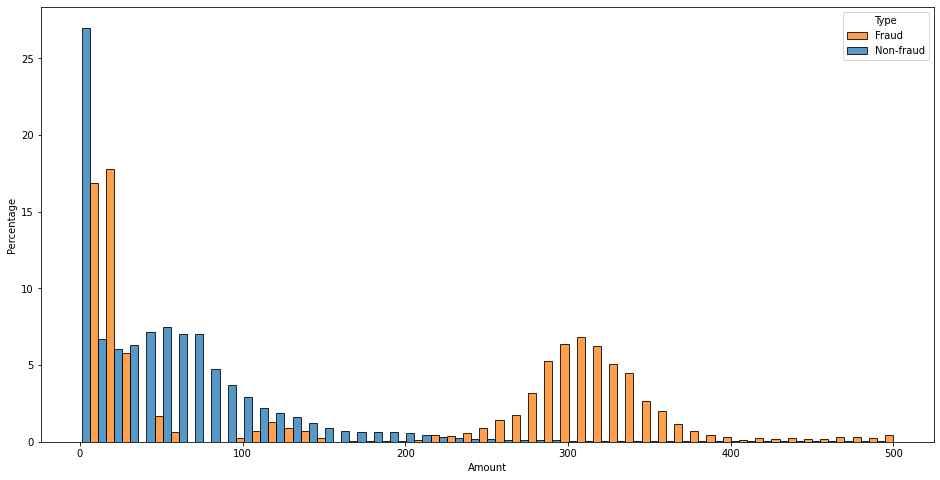

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.histplot(x='amt',data=data[data.amt<=500],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=50)
ax.set_ylabel('Percentage')
ax.set_xlabel('Amount')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

***Results***: When we zoom in further on the amount below 500, we can see that most of the fraud cases have occured on smaller amount. There is a large concentration of fraud cases occurred on amount **below 50**, and also a significant concentration of fraud cases between amount of **700 to around 1100**, and between **250 to around 370**.

This tells us that there is a strong relation between certain amount on the fraud being committed. 

We continue the EDA for the 'state' column

**3) State**

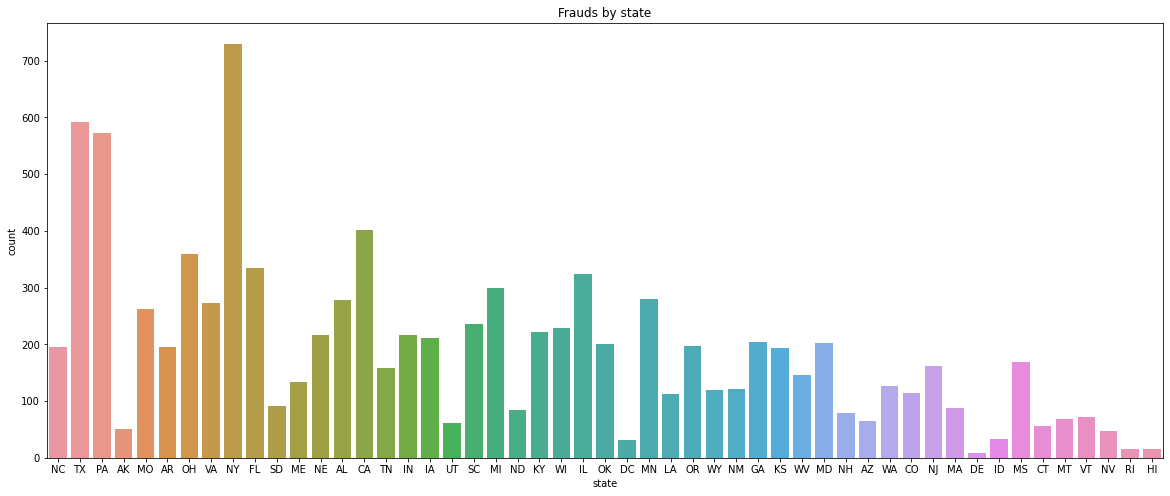

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Frauds by state')
sns.countplot(x="state",data=data[data["is_fraud"]==1])

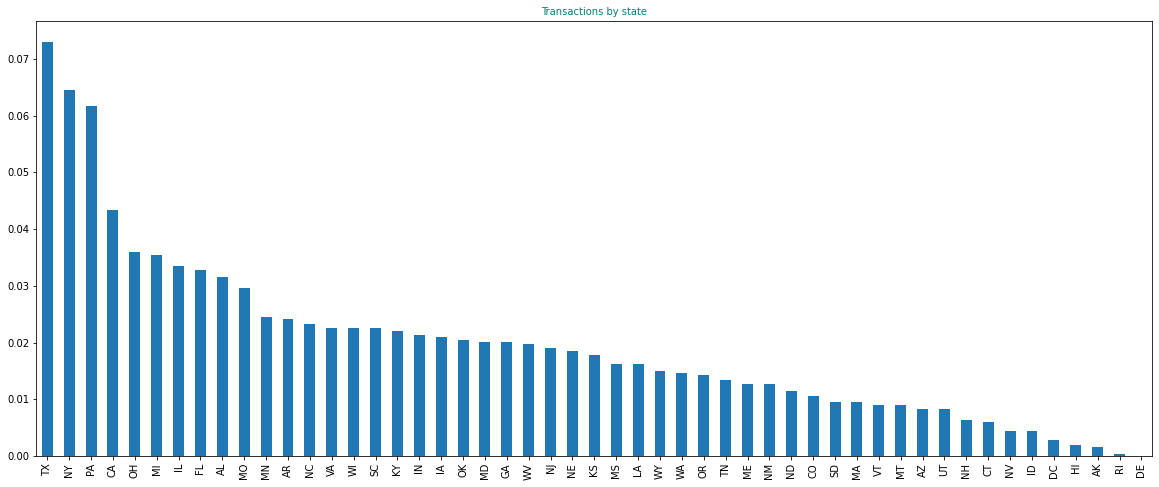

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Transactions by state', fontsize= 10, color = 'Teal', fontweight = 100)
data.state.value_counts(normalize=True).plot.bar()
plt.show()

***Results***: When we plot the 'state' against the transaction count, we note that **NY, TX and PA** have the highest transactions vs other states.

However, this does not tell us whether the said states have the highest incident of true fraud cases. 

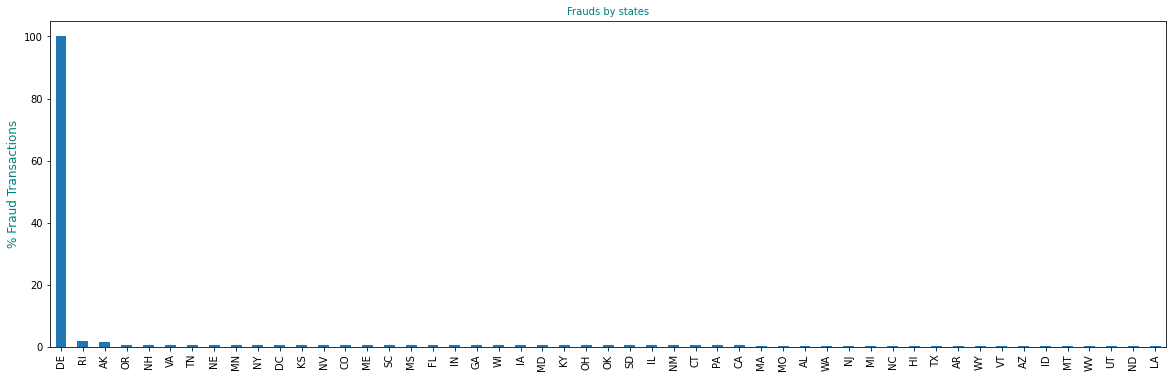

In [ ]:
plt.figure(figsize = (20,6))
total_trans = data.sort_values('state').groupby('state').count()['is_fraud']
fraud_trans = data[data.is_fraud == 1]['state'].value_counts()
percentage = fraud_trans/ total_trans * 100
plt.title('Frauds by states', fontsize= 10, color = 'Teal', fontweight = 120)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 12, 'color': 'Teal', 'fontweight' : '350'})
percentage.sort_values(ascending=False).plot.bar()
plt.show()

***Results***: From the above observation, we can see that the state: **DE** has the highest number (almost 100%) of positive fraud cases vs the aforementioned 3 states which have the highest number of transactions. Hence, the highest number of transactions does not neccessarily tell us that it also has the highest number of positive ('1') fraud cases.

This tells us that some states are highly predominant to fraud, and may be useful for our feature selections.

Next, lets look at the **Hour** when the frauds cases have occurred.

**4) Hour**

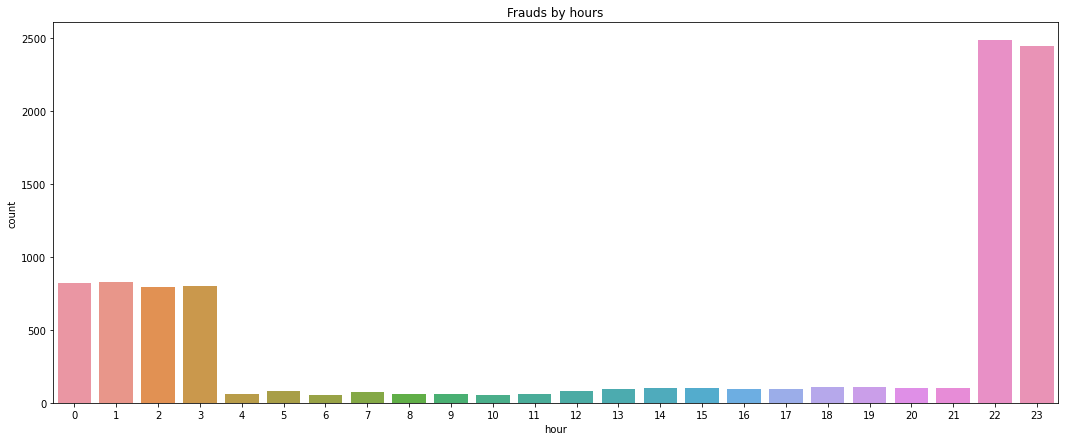

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Frauds by hours')
sns.countplot(x="hour",data=data[data["is_fraud"]==1])


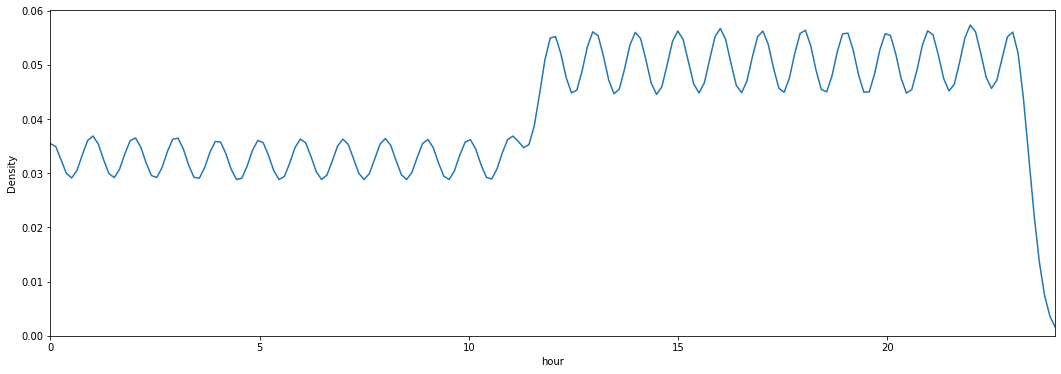

In [ ]:
plt.figure(figsize=(18,6))

sns.kdeplot(data["hour"])
plt.xlim(left = 0,right = 24)
plt.show()

***Results***: When we plot **hour** against the transaction count, we notice that the number of frauds have occurred between the **22nd and 23rd hour**, indicating that most of the frauds have occurred almost close to midnight, while the number of fraud in other times of the day are pretty evenly distributed. This perhaps suggests that fraud occur more frequently when most people are probably sleeping. This also tells us that there is a pattern in which when the fraud will likely to take place.

What about the day and month? Since we now know that most of the fraud cases occurred close to midnight, how about if we can look at which day and also the month with the higher chance of fraud cases?

**5) Day**

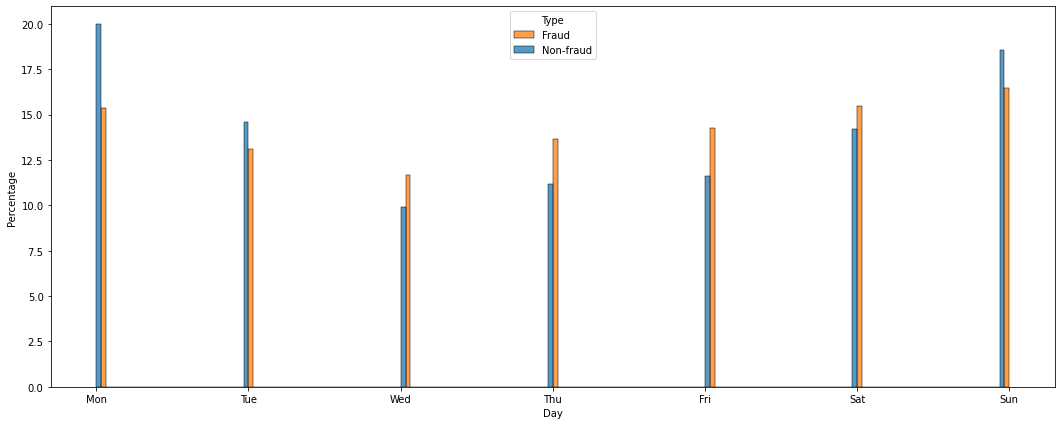

In [ ]:
plt.figure(figsize=(18,7))
ax=sns.histplot(data=data, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

***Results***: It seems that **Sunday** and **Monday** have a higher prevalence of fraud occurance, while Wednesday has the lowest fraud cases.

How about month? Is there certain months that fraud will likely to take place more? ie. holiday seasons?

**6) Month and Weeks**

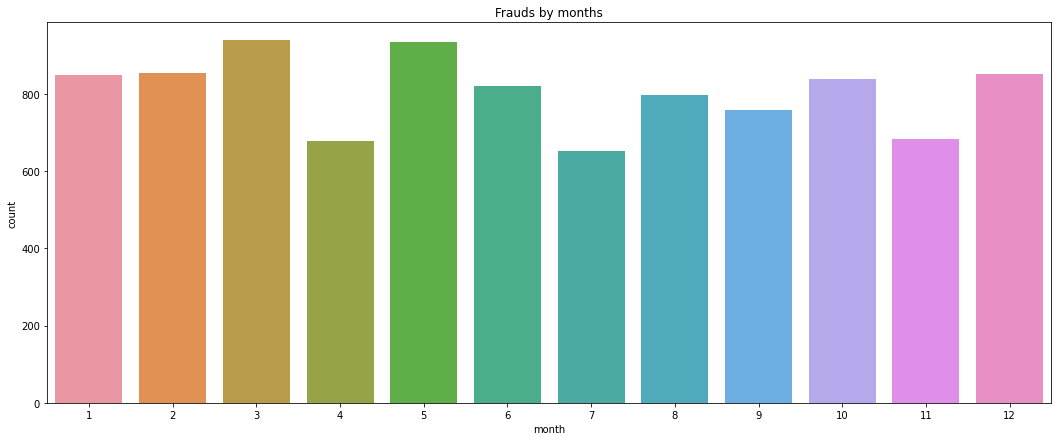

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Frauds by months')
sns.countplot(x="month",data=data[data["is_fraud"]==1])

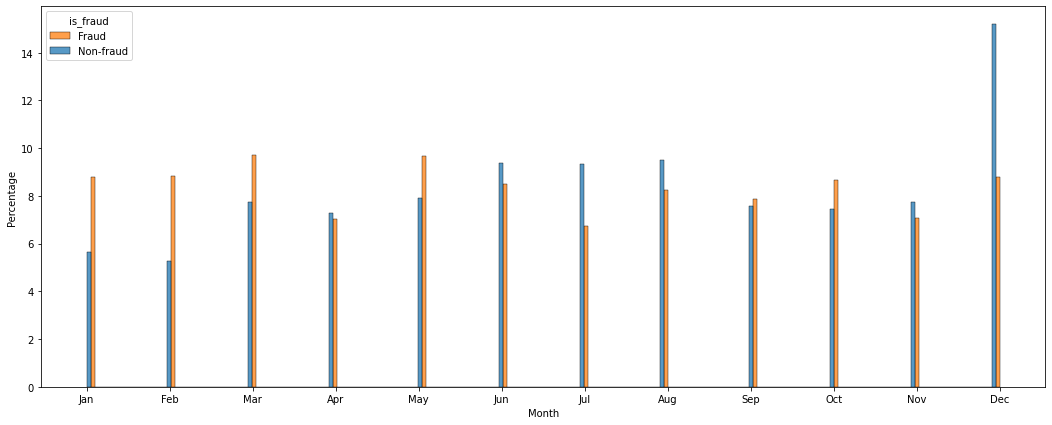

In [ ]:
plt.figure(figsize=(18,7))
ax=sns.histplot(data=data, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='is_fraud', labels=['Fraud', 'Non-fraud'])

***Results***: Based on the above analysis, it does seem that certain month have a higher number of fraud cases occurring, such as **March and May**, with the highest count, vs April and July with the lowest. This probably tells us that certain months may have a higher tendency for fraud cases to occur. December shows that it has the highest transaction, but it does not have the highest fraud cases.

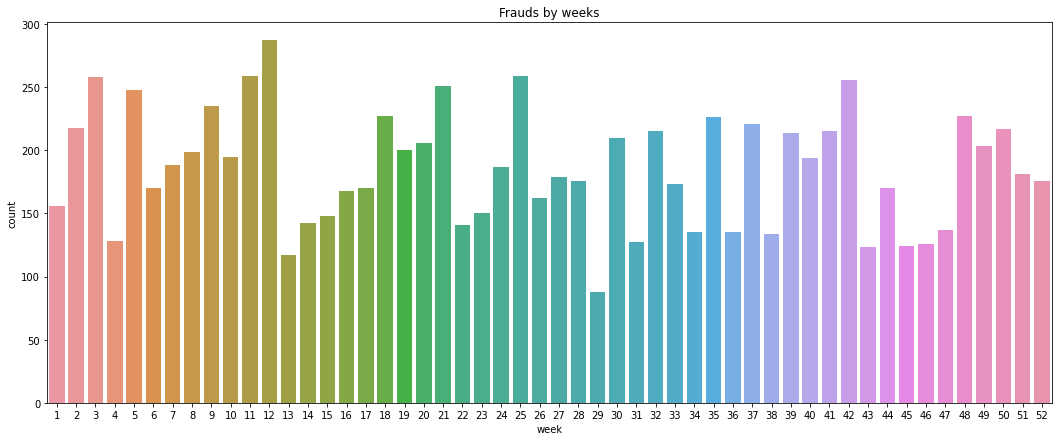

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Frauds by weeks')
sns.countplot(x="week",data=data[data["is_fraud"]==1])

***Results***: From the observations, certain weeks (i.e. **week 12, 3, 11, 25 and 42**) have the highest occurance of fraud while others (i.e. week 29 and 13) has the lowest.

We will also compare which **Year** has the higher fraud cases.

**7) Year**

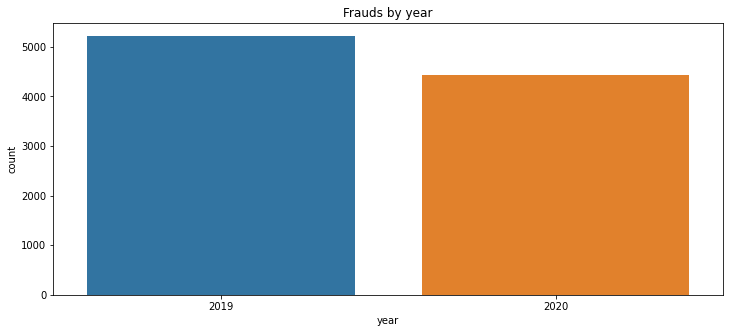

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Frauds by year')
sns.countplot(x="year", data=data[data["is_fraud"]==1])

***Results***: We can see that year **2019** has a higher number of fraud cases as compared to year 2020

Now, lets look at the **Age** distribution vs the true fraud cases.

**8) Age**

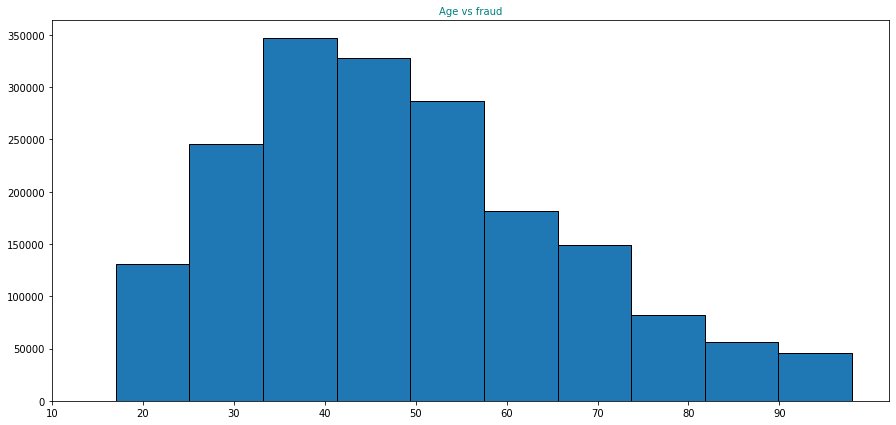

In [ ]:
plt.figure(figsize=(15,7))
age = data[data['is_fraud'] == 1]
plt.title('Age vs fraud', fontsize= 10, color = 'Teal', fontweight = 100)
plt.hist(data.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

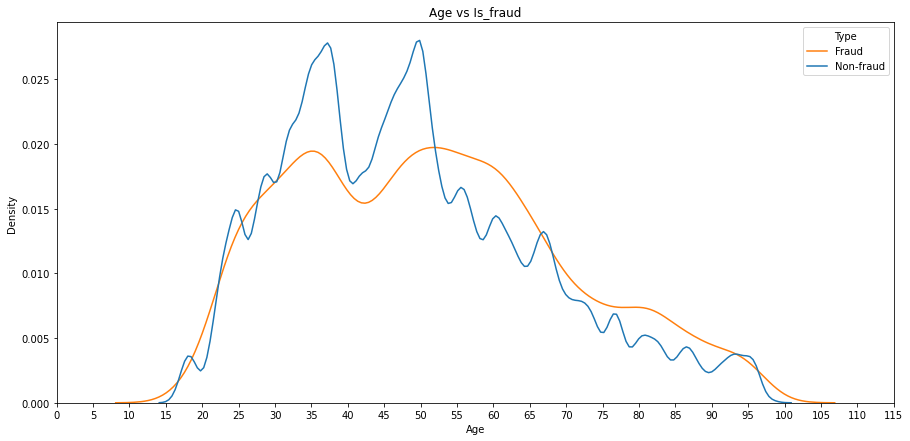

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.kdeplot(x='age',data=data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,120,5))
plt.title('Age vs Is_fraud')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

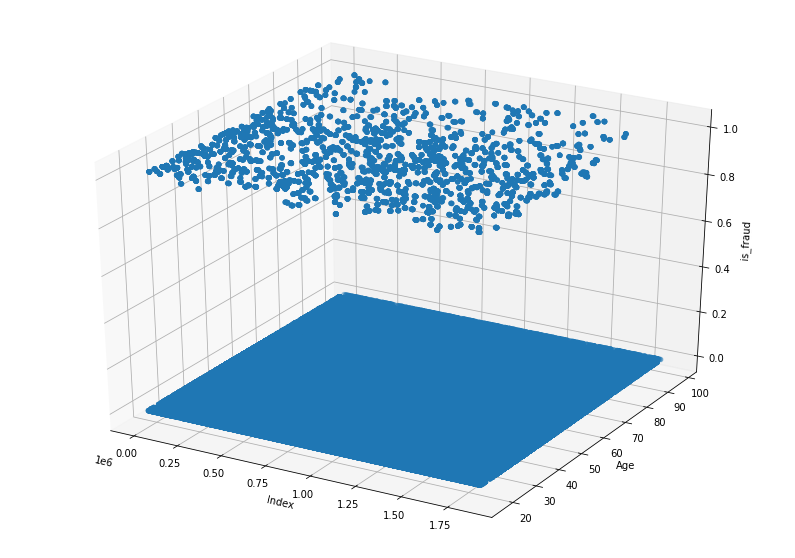

In [ ]:
td = plt.figure(figsize=(14,10)).gca(projection='3d')
td.scatter(data.index, data['age'], data['is_fraud'])
td.set_xlabel('Index')
td.set_ylabel('Age')
td.set_zlabel('is_fraud')
plt.show()

In [ ]:
data.age.describe()

count    1.852394e+06
mean     4.871065e+01
std      1.739057e+01
min      1.700000e+01
25%      3.500000e+01
50%      4.700000e+01
75%      6.000000e+01
max      9.800000e+01
Name: age, dtype: float64

We notice that the median age is between the **25% to the 75%** percentile. We will perform some **age grouping** to see the number of fraud cases in each age group. 

Perhaps there are some age groups that could be more susceptible to fraud?

In [ ]:
def grouping (row):
    rows = row["age"]
    if rows <10:
        return "less than 10"
    elif rows >=10 and rows<15:
        return "10 to 15"
    elif rows >=15 and rows<20:
        return "15 to 20"
    elif rows >=20 and rows<25:
        return "20 to 25"
    elif rows >=25 and rows<30:
        return "25 to 30"
    elif rows >=30 and rows<35:
        return "30 to 35"
    elif rows >=35 and rows<40:
        return "35 to 40"
    elif rows >=40 and rows<45:
        return "40 to 45"
    elif rows >=45 and rows<50:
        return "45 to 50"
    elif rows >=50 and rows<55:
        return "50 to 55"
    elif rows >=55 and rows<60:
        return "55 to 60"
    elif rows >=60 and rows<65:
        return "60 to 65"
    elif rows >=65 and rows<70:
        return "65 to 70"
    elif rows >=70 and rows<75:
        return "70 to 75"
    elif rows >=75 and rows<80:
        return "75 to 80"
    elif rows >=80 and rows<85:
        return "80 to 85"
    elif rows >=85 and rows<90:
        return "85 to 90"
    else:
        return "greater than 90"
data["age_group"] = data.apply(grouping,axis=1)


In [ ]:
data.age_group.value_counts()

35 to 40           244932
45 to 50           219280
50 to 55           194674
30 to 35           181308
40 to 45           165952
25 to 30           151550
55 to 60           134135
60 to 65           123188
65 to 70           106910
70 to 75            72505
20 to 25            68109
75 to 80            46901
greater than 90     45445
80 to 85            44765
85 to 90            33018
15 to 20            19722
Name: age_group, dtype: int64

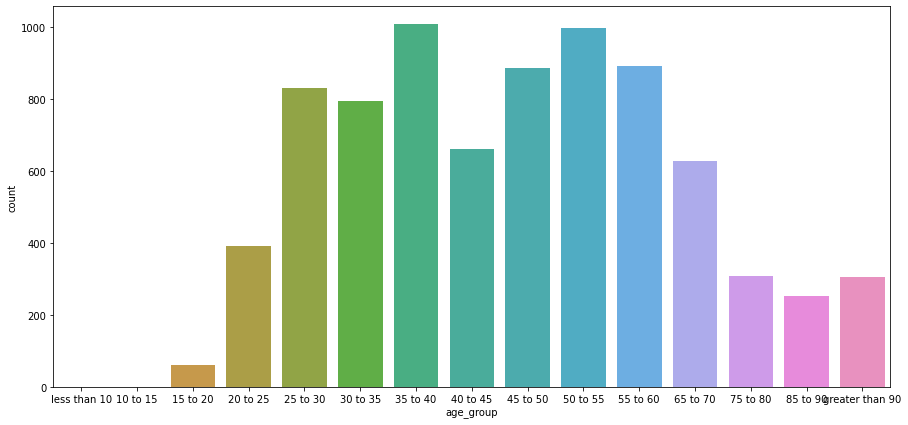

In [ ]:
plt.figure(figsize=(15,7))
order = ["less than 10","10 to 15","15 to 20","20 to 25","25 to 30","30 to 35","35 to 40","40 to 45","45 to 50","50 to 55","55 to 60","65 to 70","75 to 80","85 to 90","greater than 90"]
sns.countplot(x="age_group",data=data[data["is_fraud"]==1], order = order)

***Results***: From the above observation, we can see that there is a higher prevalence of fraud cases between age **25 to 60 years old**.

The highest transaction have occurred in age group of **35 to 40 years old**. This perhaps tell us that the younger age group do shop more hence with the higher transaciton count. However, the highest number of fraud cases in relation to the total number of transactions is under the age group of **50-55 years old**. This perhaps suggests that people within this age group are more susceptible to fraud compared to other age groups.


Now lets look at the **Gender** column, to see what is the distribution between Male and Female in relation to fraud.

Lets replace M and F to 0 and 1 first, as this will also help us with the model training on the later part.

**9) Gender**

In [ ]:
data['gender'] = data['gender'].replace(('M', 'F'), (0,1))

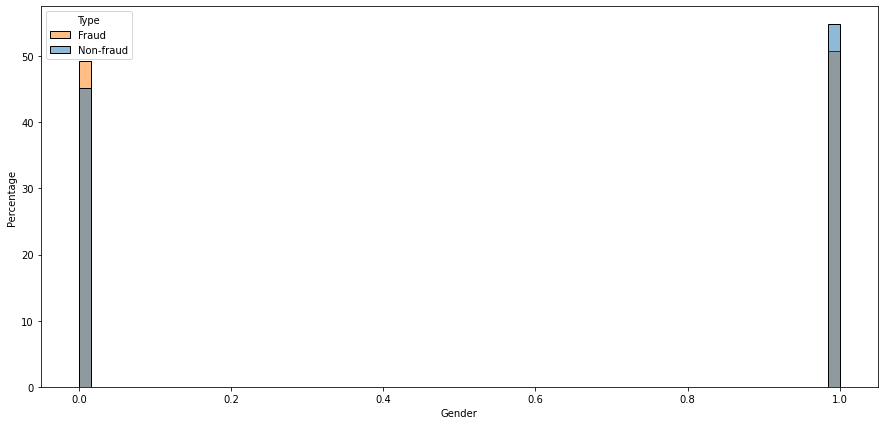

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.histplot(x='gender',data=data, hue='is_fraud',stat='percent', common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Gender')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

***Results***:  From the above observations, it seems that the percentage of fraud for Male vs Female is pretty even distributed. However, female has a higher transaction count, perhaps due to more likelihood for Females to shop more often than Males.


Now lets look into the merchant lists and see if we can find something meaningful from there

**10) Merchants**

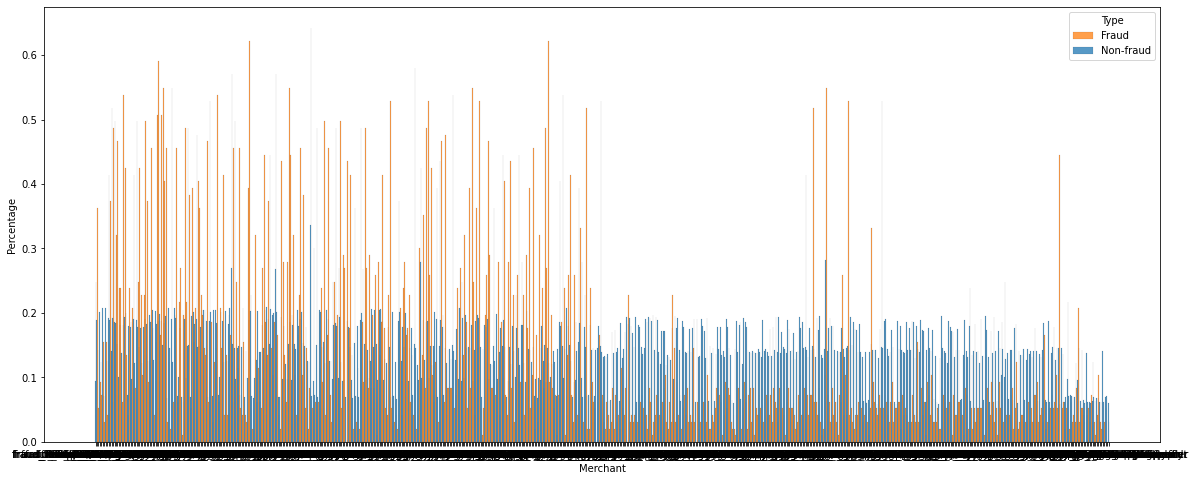

In [ ]:
plt.figure(figsize=(20,8))
ax=sns.histplot(x='merchant',data=data,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=200)
ax.set_ylabel('Percentage')
ax.set_xlabel('Merchant')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

***Results***: The 'merchant' lists tell us that there are many merchants where the fraud cases have occurred. However, we are unable to clearly see from this plot which are the merchants the fraud cases have mostly occurred at.

Perhaps we can try to look at it deeper using the groupby function.

In [ ]:
merchant_total = data.sort_values('merchant').groupby('merchant').count()['is_fraud']
merchant_total.head()

merchant
fraud_Abbott-Rogahn                 2647
fraud_Abbott-Steuber                2529
fraud_Abernathy and Sons            2513
fraud_Abshire PLC                   2733
fraud_Adams, Kovacek and Kuhlman    1354
Name: is_fraud, dtype: int64

Here, we see that fraud_Abbott-Rogahn has the highest number of fraud transactions.

In [ ]:
merchant_fraud = data[data.is_fraud == 1]['merchant'].value_counts()
merchant_fraud.head()

fraud_Kilback LLC     62
fraud_Rau and Sons    60
fraud_Kozey-Boehm     60
fraud_Doyle Ltd       57
fraud_Terry-Huel      56
Name: merchant, dtype: int64

However, **fraud_Kilback LLC** has the highest number of fraud cases.

In [ ]:
merchant = merchant_fraud/ merchant_total * 100
merchant.sort_values(ascending=False)

fraud_Kozey-Boehm                        2.175489
fraud_Herman, Treutel and Dickens        2.032086
fraud_Terry-Huel                         1.955307
fraud_Kerluke-Abshire                    1.897533
fraud_Mosciski, Ziemann and Farrell      1.878766
                                           ...   
fraud_Paucek-Wiza                             NaN
fraud_Reichert-Weissnat                       NaN
fraud_Ritchie, Bradtke and Stiedemann         NaN
fraud_Schroeder Group                         NaN
fraud_Wiegand-Lowe                            NaN
Length: 693, dtype: float64

***Results***: Here we can see that **fraud_Kozey-Boehm** has the highest percentage of true fraud cases relative to the total number of transactions. This also tells us that some merchants are more prone to fraud, and this can provide important clues for our feature selection to be used for the model training later.

Now let us look at the City column to try to see if we can find something useful.

**11) City**

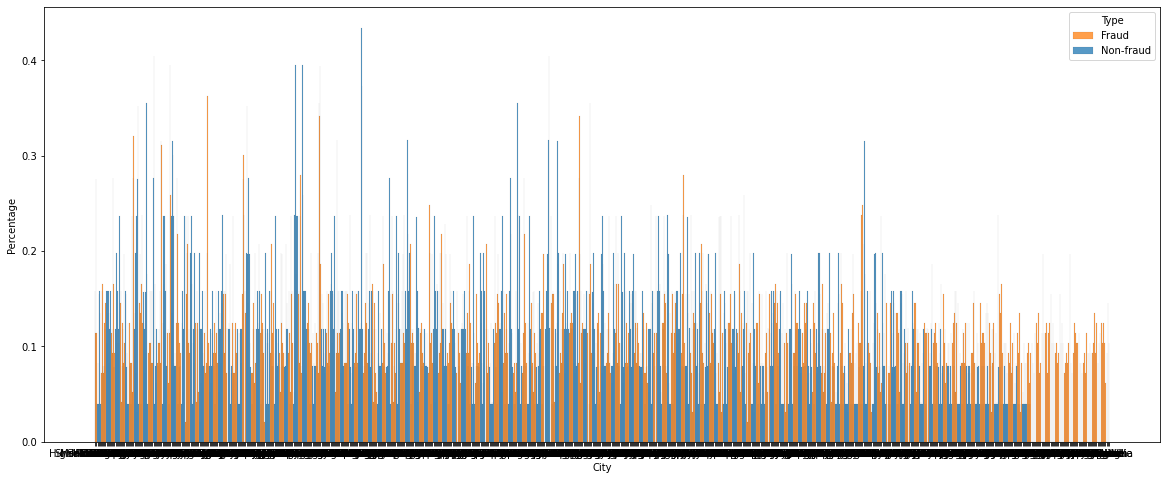

In [ ]:
plt.figure(figsize=(20,8))
ax=sns.histplot(x='city',data=data,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=500)
ax.set_ylabel('Percentage')
ax.set_xlabel('City')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

***Results***: It is difficult to visualise all the cities within a plot, as there are over 900 elements of the cities. Hence, it is quite difficult to see meaningful data from this plot. However, we can briefly see that the cities located on the right hand side of the bar plot possibly shows that it has a 100% fraud occurance.

Lets zoom in further by using the groupby function.

In [ ]:
city_total = data.sort_values('city').groupby('city').count()['is_fraud']
city_fraud = data[data.is_fraud == 1]['city'].value_counts()
city = city_fraud/ city_total * 100
city.sort_values(ascending=False).head(10)

Rice             100.0
Norfolk          100.0
Ridge Spring     100.0
East China       100.0
Queen Anne       100.0
Waukau           100.0
Pleasant Hill    100.0
Freeport         100.0
Phelps           100.0
Beacon           100.0
dtype: float64

***Results***: When we looked closer at the cities where fraud cases have occured, we can see that some cities have 100% of fraud occurance! This tells use that some cities are fully fraud and some don't. 


Now, lets take a look to see if the job column is able to provide us good data feature to be use for the ML modelling.

**12) Jobs**

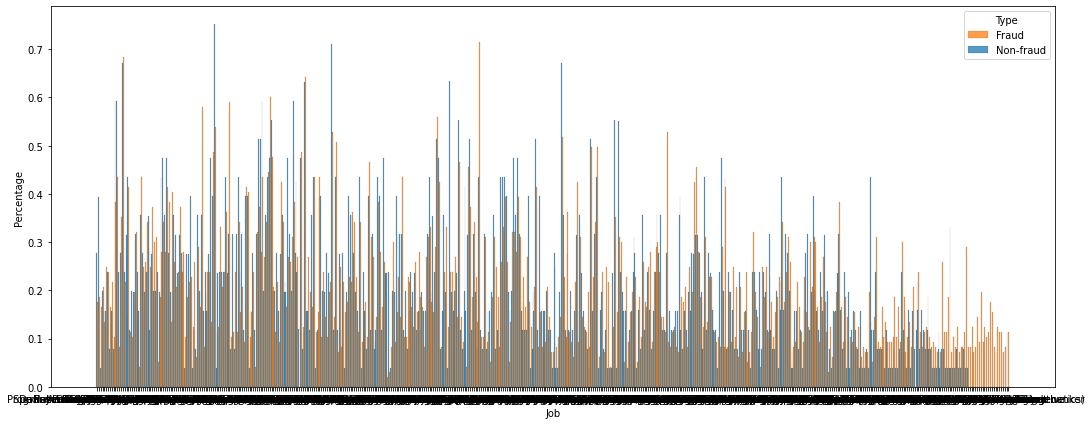

In [ ]:
plt.figure(figsize=(18,7))
ax=sns.histplot(x='job',data=data,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=200)
ax.set_ylabel('Percentage')
ax.set_xlabel('Job')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

Similar to the city column, there are over 900 elements within the job column itself, making it difficult to look at which job has a higher prevalence of fraud. 

Lets try to zoom in further using the groupby function.

In [ ]:
job_total = data.sort_values('job').groupby('job').count()['is_fraud']
job_fraud = data[data.is_fraud == 1]['job'].value_counts()
job = job_fraud/ job_total * 100
job.sort_values(ascending=False).head(10)

Homeopath                            100.0
Accountant, chartered                100.0
Forest/woodland manager              100.0
Software engineer                    100.0
Ship broker                          100.0
Armed forces technical officer       100.0
Dancer                               100.0
Sales promotion account executive    100.0
Air traffic controller               100.0
Broadcast journalist                 100.0
dtype: float64

***Results***: Here, we can see that there is quite a long lists of jobs with fraud cases. The above lists of job all have 100% of fraud cases! This tells us that there is a strong relation in certain jobs relative to fraud.

Let take a look at City Population to see if there are any relationship between the number of population vs fraud cases.

**13) City Population**

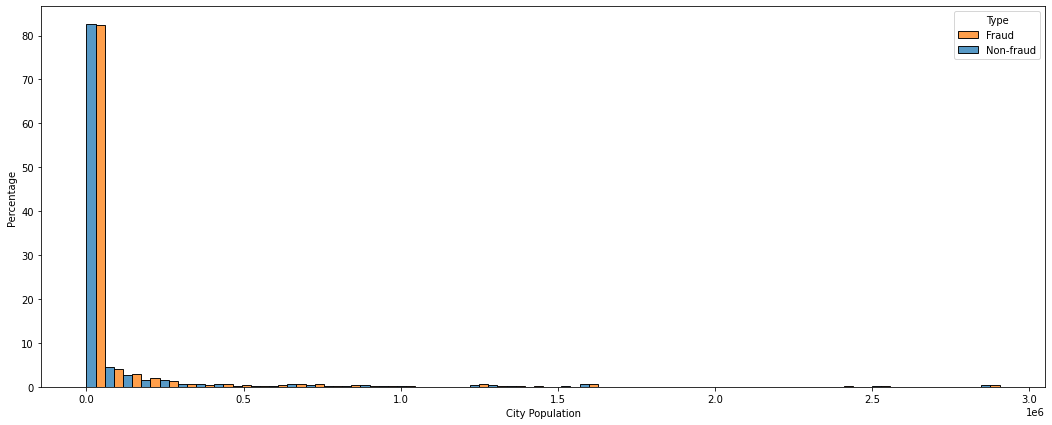

In [ ]:
plt.figure(figsize=(18,7))
ax=sns.histplot(x='city_pop',data=data,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=50)
ax.set_ylabel('Percentage')
ax.set_xlabel('City Population')
plt.legend(title='Type', labels=['Fraud', 'Non-fraud'])

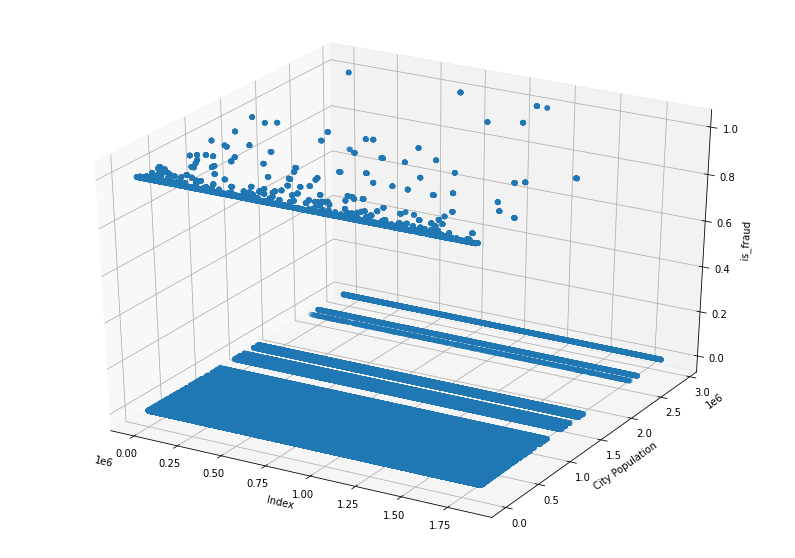

In [ ]:
td = plt.figure(figsize=(14,10)).gca(projection='3d')
td.scatter(data.index, data['city_pop'], data['is_fraud'])
td.set_xlabel('Index')
td.set_ylabel('City Population')
td.set_zlabel('is_fraud')
plt.show()

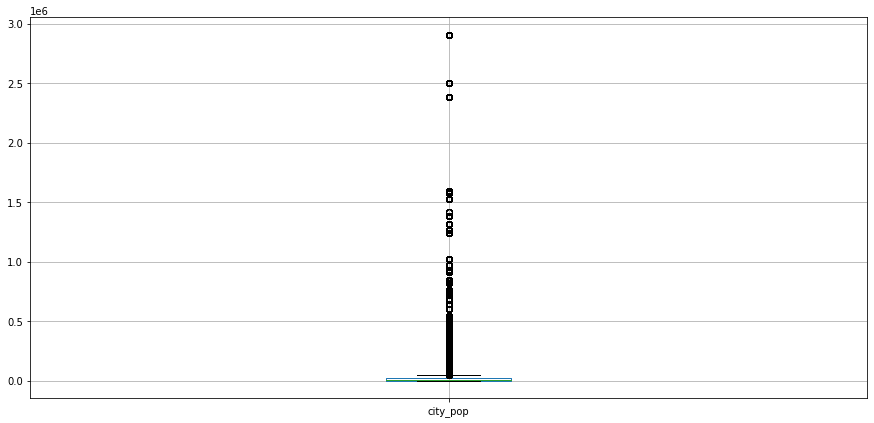

In [ ]:
boxplot = data.boxplot(column=['city_pop'],figsize=(15,7))

***Results***: We can see that cities with **lower population size** has a higher percentage of fraud cases vs population of cities with larger population. Majority of the fraud cases (over 80%) occurred in cities with population that are lower. This tells us that cities with lower population have more occurance to fraud.

Let's explore further into the 'cc_num' (credit card number) to see if there is any relationship with our target.

**14) Credit Card number**

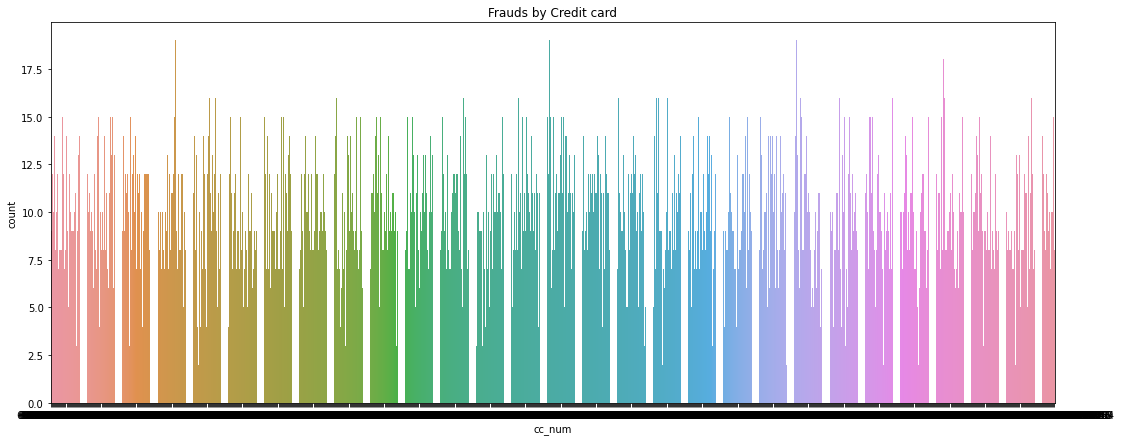

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Frauds by Credit card')
sns.countplot(x="cc_num",data=data[data["is_fraud"]==1])

In [ ]:
cc_fraud = data[data.is_fraud == 1]['cc_num'].value_counts()
cc_fraud.head(15)

4593569795412          19
4599285557366057       19
3520550088202337       19
6538441737335434       18
4260128500325          18
4874006077381178       16
6538891242532018       16
213112402583773        16
4725837176265195730    16
3577794103155425       16
4400011257587661852    16
3576021480694169       16
3556613125071656       16
4629451965224809       16
3518669219150142       16
Name: cc_num, dtype: int64

***Results***: Here, we see that some credit card numbers have multiple fraud cases, for instant, up to 19 occurences. As there are too many different credit card numbers in this column, and many of the credit cards have multiple fraud transations, it is perhaps not a good feature for our ML model to learn. 


Now lets take a look at the latitude and longitude of the customers and merchant, and see if there are any relationships.

**15) 'lat' and 'long' 16) 'merch_lat' and 'merch_long'**

Since the 'lat' and 'long' only tells use the latitude and longitude of the transactions, and 'merch_lat' and 'merch_long' tells us the latitude and longitude of the merchant location, it is perhaps not very useful for us since it does not provide us meaningful and useful data from these numbers. 

Perhaps if we calculate the distance between the merchant location and where the transaction have occurred can give us some insights?

Let try to see if there are any insightful data we can find if we calculate the distance.

In [ ]:
data['lat_distance'] = abs(data.lat - data.merch_lat)
data['long_distance'] = abs(data['long'] - data['merch_long'])

To find the distance between the customer/transaction and merchant location, we take the customer/transaction location and minus the merchant location. This will give us the difference between the customer/transaction and merchant location.

In [ ]:
data['distance'] = np.sqrt(pow((data['lat_distance']*110),2) + 
                             pow((data['long_distance']*110),2))

Now that we have the difference between the customer and merchant, we use pythogerous therom to calculate the distance.

The difference between the degree of latitude and longitude is about 110km

In [ ]:
data.loc[(data['distance'] < 50), ['location']] = "Nearest"
data.loc[((data['distance'] >= 50) & (data['distance'] <= 100)), 
       ['location']]= "Further"
data.loc[(data['distance'] > 100), ['location']] = "Furthest"

In [ ]:
data.location.value_counts(normalize = True) *100


Further     48.672151
Furthest    35.117691
Nearest     16.210158
Name: location, dtype: float64

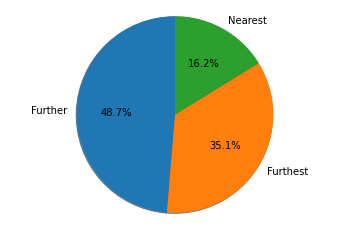

In [ ]:
labels = "Further", "Furthest", "Nearest"
sizes = [48.67, 35.11, 16.21]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, radius=3, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

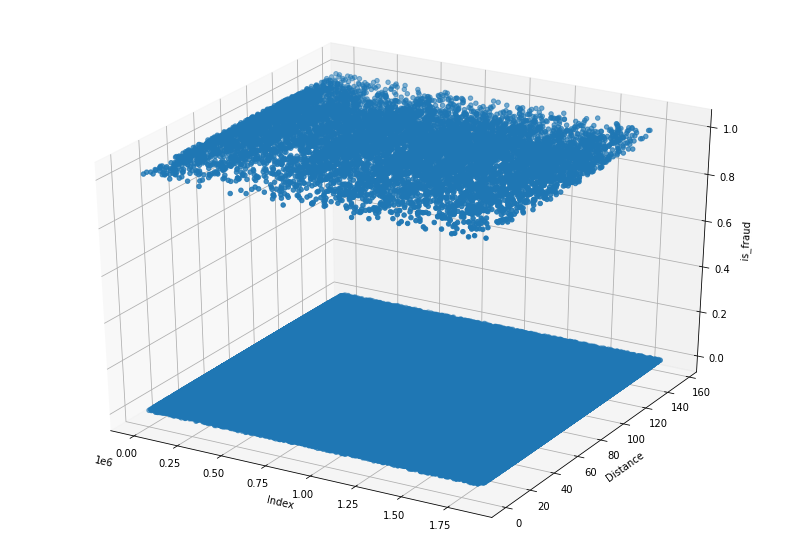

In [ ]:
td = plt.figure(figsize=(14,10)).gca(projection='3d')
td.scatter(data.index, data['distance'], data['is_fraud'])
td.set_xlabel('Index')
td.set_ylabel('Distance')
td.set_zlabel('is_fraud')
plt.show()

***Results***: Over here, we segregated into **3 groups**; the first group where distance below 50 is considered the **nearest** to the merchant, whereas the 2nd group of between 50 and 100 as located **further** away, and the 3rd group of more than 100 considered located the **furthest** away from the merchant.

From the results, we can conclude that over 80% of the fraud cases have happened on merchants located further to furthest away from the customer.

**16) Zip**

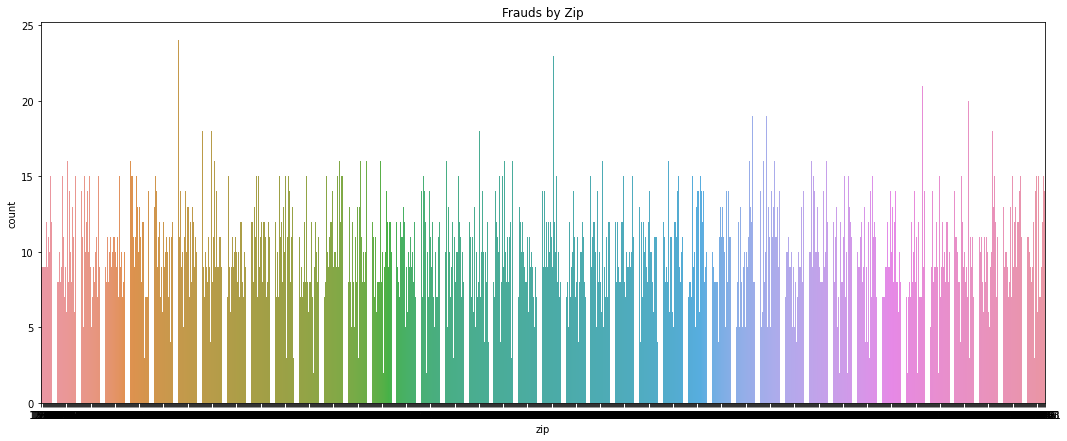

In [ ]:
plt.figure(figsize=(18,7))
plt.title('Frauds by Zip')
sns.countplot(x="zip",data=data[data["is_fraud"]==1])

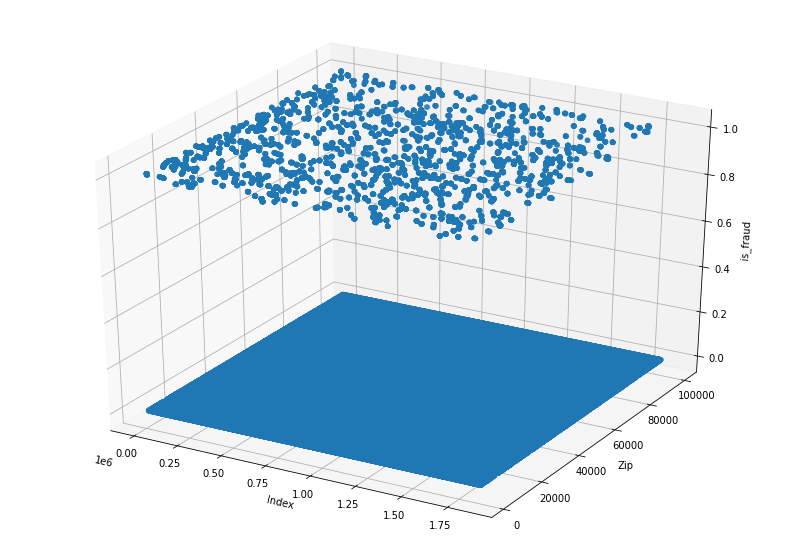

In [ ]:
td = plt.figure(figsize=(14,10)).gca(projection='3d')
td.scatter(data.index, data['zip'], data['is_fraud'])
td.set_xlabel('Index')
td.set_ylabel('Zip')
td.set_zlabel('is_fraud')
plt.show()

In [ ]:
zip_fraud = data[data.is_fraud == 1]['zip'].value_counts()
zip_fraud.head(15)

15010    24
48088    23
82514    21
16034    21
91206    20
67020    19
55606    19
68375    19
34112    18
95148    18
41812    18
16858    18
16114    18
36541    17
57374    16
Name: zip, dtype: int64

***Results***: When we examine the zip column, it is difficult to tell which are the zip area that are more prone to fraud cases. However, we are able to isolate that some zip areas are 100% fradulent. 

# **Feature Selection**


Now that we have looked at most of the features from the dataset, lets **drop** some of the columns that we will not be using for the model training. 

We will also discuss the reasons for dropping the columns, and also reasons for selecting the features for our training.


'**Gender**': Since there is not much correlation between gender and our target (i.e. There is also no significant difference between M and F with regard to the fraud cases), we will drop this column as this may affect our prediction result. 

'**Amt**':  The amount column has correlation with the target 'is_fraud' as can be seen from the analysis above. There is a higher incidents of fraud cases from the smaller transaction amount vs large amount. Hence, the model perhaps may be able to learn from these patterns to predict the results more accurately. We will hence use the amount column as one of the features for the ML training.

'**cc_num**': The credit card number does not provide us much insight to whether there is any correlation with the target, as many of the credit cards have multiple fraud transactions with them. Due to the large number of elements within the cc_num column, it is also difficult to visualise them to find any meaningful patterns for this supervisied learning. However, it can be noted that more analysis can be done with the credit card numbers (i.e. break it down further such that we may separate the card numbers into Mastercard vs Visa card number etc. to see if there is a higher number of fraud cases respectively). Hence, we will drop this column.

'**category**': The category feature tells us on which category the fraud cases have occurred. Based from the observations above, we found that certain categories have a higher prevalence of fraud occurring, hence we think that there are patterns associated with the category and target, which could be useful for the model to learn. As such, we will use this category feature for the training.

'**age**': We find that age provides us important clues of the fraud cases, especially when we separated the age into age group, and find that certain age groups are more prone to being a target of fraud vs other age groups. Hence, we will use age as one of the feature for the training.

'**city**': Although we are able to find that certain cities have a complete 100% fraud cases, we think that it will be difficult for our ML model to train. It is also difficult to encode the multiple elements of this column to be used for the training.

'**state**': We can see from the data that certain states have a higher proportion of fraud cases. Hence, this could provide good information/pattern for the training of our model. We will include the state as our feature for the model training. The state also include an acceptable number of elements which should not be too taxing for the system.

'**job**': The 'job' feature tells us that certain jobs are fully fraudulent. We think that this can give us important clue to be used for our ML training, and would love to include job as one of our feature. However, keep in mind that the number of elements are over 400. Hence, this may caused some system issue due to the large number of columns when performing scaling/encoding or under/oversampling. As such, we will drop this column for the training. However, we may include this column as one of the features for the experimental log.

'**hour**': We find that most of the fraud cases have occurred close to mid-night. This are important information since there is a distinct pattern on when a fraud could occur. Hence, we will include this as one of our feature.

'**Week, Months, Day**': From the observations, we see that certain months, days and weeks have higher occurances of fraud. This tells us that there are patterns in the data why fraud is likely to occur. Hence, we will use them as the features for our model training.

'**Year**': Given that there are only 2 elements in this feature, similar to the Gender feature, and there is no significant difference in the number of fraud cases between 2019 and 2020, this will likely affect the overall results. Hence, we will drop this feature.

'**first**' and '**last**': These 2 columns refer to the first and last name of the customers. It does not  us much about whether certain first or last names have a higher occurance of fraud, it is also difficult to visualise the names and derive any meaningful insight from them. Hence, we will drop these 2 columns.

'**Unix_time**': The unix_time only tell us the time format the transactions have occurred. There are no meaningful patterns in the data that tells us whether the fraud will likely to occur. Hence, we will drop this column.

'**street**': We will also drop this Street column, since the column only shows us the name of the street where the transactions have occurred. It is also difficult to present it on the graph to derive any meaningful insights.

'**merchant**':The merchant column has shown that some merchant are clearly fraudulent, which we find may be useful for our model to learn in the fraud detection. However, due to the large number of elements in this column, it will be difficult and too taxing for the system. In fact, the system crashed several times when we try to encode/scale the dataset when merchant is included. Hence, we will drop this column. However, we will include this feature for the testing purpose on our experimental log to see if it can provide good training for our model.

'**trx_number**': This column only tell us what is the transaction number of the transaction. There is no useful data we can gather here that we can use for our model. Hence, we will drop this column.

'**zip**': Data analysis of the zip column is able to tell us that some zip area are fully 100% prone to fraud. However, as there are too many elements in this feature, we will drop this column and not include it in our model training.

'**lat**' and '**merch_lat**': The 'lat' shows the transaction latitude, and 'merch_lat' shows the location of the merchant. Other than that, it doesn't really tell us much of this column. However, we are able to get some insights and derived some conclusion after taking the difference between the 'lat' and 'merch_lat' that some transactions have occurred more frequently depending on the distance between the location of the transaction and merchant location. Nevertheless, we will be dropping both columns.

'**long**' and '**merch_long**': Similar to the 'lat' and 'merch_lat' features, the 'long' tells us the transaction longitude, and 'merch_long tells us the longitude of the merchants. We will not include these two features on our model training since it does not really provide much insight or pattern for our model training.



***Dropping the columns***

We will be dropping the columns which we have discussed as above that we think it may not be of used for the training of our model. However, in order to find out which are the best features that can give the best results, we will also perform testing of using different columns for the training and testing. This will be further discussed and analysed in the experimental log.

For the purpose of this milestone, we will select the lists of features as will be mentioned below to train our model. 

In [ ]:
data.drop(['cc_num', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'unix_time', 'first', 'last', 'gender', 'year','street', 'city', 'trans_num', 'merchant','job'], axis=1, inplace=True)

In [ ]:
data.head(5)

,category,amt,state,city_pop,is_fraud,hour,month,day,week,age
0,misc_net,4.97,NC,3495,0,0,1,1,1,34
1,grocery_pos,107.23,WA,149,0,0,1,1,1,44
2,entertainment,220.11,ID,4154,0,0,1,1,1,60
3,gas_transport,45.00,MT,1939,0,0,1,1,1,55
4,misc_pos,41.96,VA,99,0,0,1,1,1,36


After dropping the columns, we now have a total of 10 columns which will be used for the feature engineering.

***Categorical and Numerical features***

We see that there are a number of categorical columns (object64) which requires encoding. We will use the dummies encoding method and then concat the encoded columns with the main column.

Since the numerical columns are already in numerical format (int64/float64), We do not need to do further data transformation of the numerical features.

In [ ]:
numerical_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(object)

print('Numerical features:', numerical_features.columns)
print('Categorical features: ', categorical_features.columns)

Numerical features: Index(['amt', 'city_pop', 'is_fraud', 'hour', 'month', 'day', 'week', 'age'], dtype='object')
Categorical features:  Index(['category', 'state'], dtype='object')


***Encoding the Categorical features using dummies encoding***

In [ ]:
data_with_encoded = pd.concat([data, pd.get_dummies(data["state"]), pd.get_dummies(data["category"])], axis=1)
data = data_with_encoded.drop(["state","category"],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
data.head(5)

,amt,city_pop,is_fraud,hour,month,day,week,age,AK,AL,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,3495,0,0,1,1,1,34,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,149,0,0,1,1,1,44,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,4154,0,0,1,1,1,60,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1939,0,0,1,1,1,55,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,99,0,0,1,1,1,36,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/My Drive/Data/DS/fraudencoded.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)  

After encoding the categorical features, we now have a total of 73 columns including the target column.

***Defining the X and Y before training of the model***

In [ ]:
X = data.drop(['is_fraud'], axis=1) 
y = data['is_fraud']

Now we need to scale our dataset before performing any training of the data. Let's use the min max scale for this dataset.

***Scaling the dataset***

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X) 
print(X)

[[1.37142936e-04 1.19449117e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.66969625e-03 4.33484697e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.56911555e-03 1.42121054e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.96670916e-03 1.25951387e-03 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.41468293e-04 3.64677603e-05 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.28264917e-03 3.99005462e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


# **Feature Engineering - PCA**

We will try using the **Principal Component Analysis (PCA)** on the **feature extractions** of our dataset and see if it is able to provide us better training data for our models. We will also be comparing the results for the dataset with PCA and without PCA performed. 

***PCA*** 

Let's define the PCA. We will set the principal component as 4 for this milestone.

In [ ]:
pca = PCA(n_components=4)
X_t = pca.fit_transform(X)


In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.17774245 0.14895042 0.13418501 0.09824986]
[0.07563128 0.06337997 0.05709714 0.04180635]


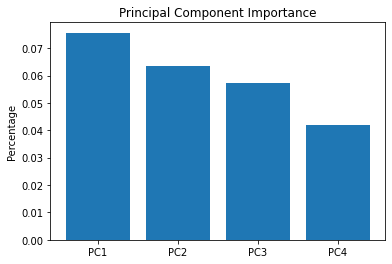

In [ ]:
Cols = ['PC1','PC2','PC3','PC4']
rData = pca.explained_variance_ratio_

plt.bar(Cols, rData)
plt.title('Principal Component Importance')
plt.ylabel('Percentage')
plt.show()

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.23791474538989874

In [ ]:
pca.components_

array([[ 3.78074725e-05,  1.74391410e-04,  1.58473269e-03,
        -7.33600938e-01,  2.06075738e-02, -6.79252865e-01,
        -1.56989559e-04,  8.45843803e-05,  3.23015835e-04,
         4.65717538e-05,  4.89717611e-05, -9.16666384e-04,
        -1.74582602e-04,  1.13560545e-04,  1.50672931e-04,
         1.01472093e-05,  5.09575113e-05, -4.59486574e-05,
        -9.02053563e-05, -1.79265087e-04,  6.87181402e-05,
        -4.34471070e-04,  1.52541459e-04,  2.11079997e-04,
        -5.68551743e-04,  1.25332800e-04,  3.10274844e-05,
        -3.09579355e-04,  1.99708607e-04,  5.34283505e-04,
         4.37480386e-05,  2.00947916e-04,  1.95538475e-04,
         1.62428915e-04, -2.53953932e-04, -3.40114271e-04,
         9.97003942e-06,  6.02845535e-05, -1.05341139e-04,
         8.86427842e-05, -1.56115515e-04,  2.57991898e-04,
        -6.57434407e-04, -4.07362657e-05,  4.20871592e-04,
         2.38198796e-04,  2.59243081e-05,  1.40772841e-04,
        -1.09778189e-04,  2.14880397e-04,  2.98382236e-0

In [ ]:
X_reduced_df = pd.DataFrame(X_t, columns=["1st principal component", "2nd principal component","3rd principal component","4th principal component"])

In [ ]:
X_reduced_df.head()

,1st principal component,2nd principal component,3rd principal component,4th principal component
0,0.772203,0.425921,-0.343601,0.062015
1,0.774437,0.725248,-0.350340,0.727227
2,0.772874,0.301531,-0.346430,0.033810
3,0.771598,0.833377,-0.349832,-0.674085
4,0.771472,0.398857,-0.342083,0.053704


Now that we have gathered the values of the 4 principal components, lets combined the dataset with our target so that we can run some tests on it.

In [ ]:
fraud_reduced = pd.concat([X_reduced_df, y], axis=1)  

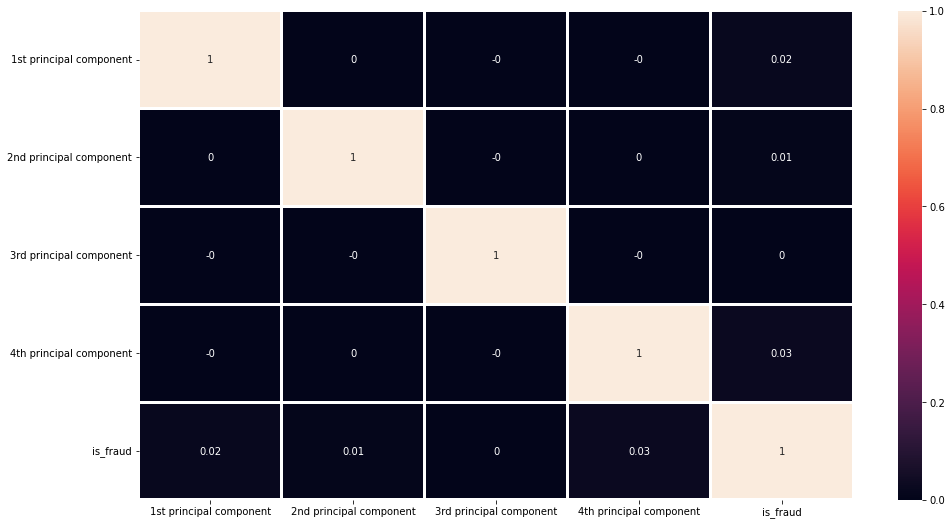

In [ ]:
plt.figure(figsize=(16,9))
corr_matrix = fraud_reduced.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, linewidths=2)

plt.show()

***Results:*** We can see that there is no significant correlation (**below 75%**, low collinearity)  between our principal component features, which tells us that it is safe to proceed with the dataset.

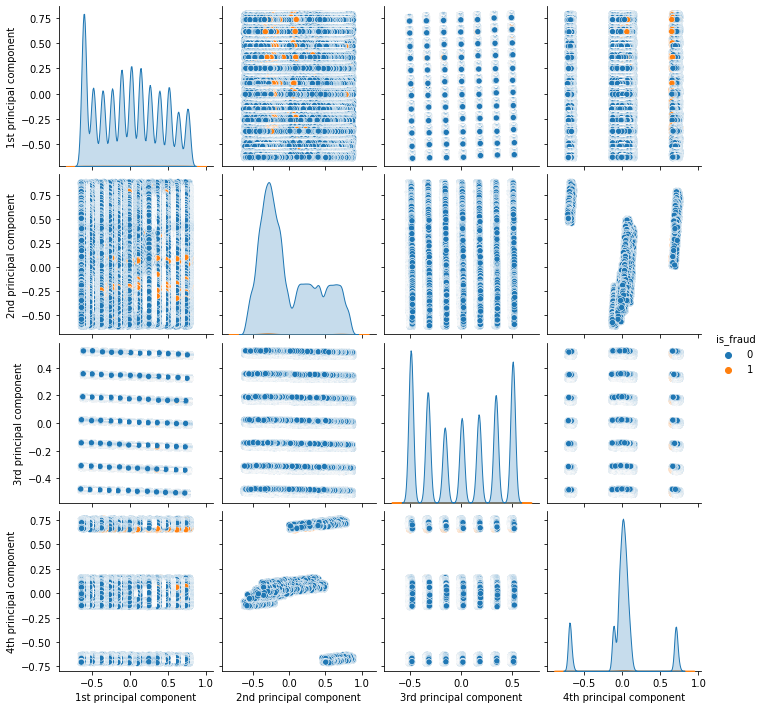

In [ ]:
sns.pairplot(fraud_reduced, hue='is_fraud')
#takes over 5 minutes to run

Now lets try to run some test using Logistic Regression and Decision Tree with our transformed PCA dataset and compare the results.

***Train Test Split for PCA***

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_df, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)     
print('X_train data size', X_train_pca.shape)
print('y_train data size', y_train_pca.shape)
print('X_test data size' , X_test_pca.shape)
print('y_test data size' , y_test_pca.shape)

X_train data size (1481915, 4)
y_train data size (1481915,)
X_test data size (370479, 4)
y_test data size (370479,)


***Logistic Regression - PCA***

In [ ]:
lrc_pca = LogisticRegression(random_state=42)
model_lrc_pca = lrc_pca.fit(X_train_pca, y_train_pca)

lrc_pred_pca = model_lrc_pca.predict(X_test_pca)

Accuracy score: 99.47905279381557
Precision score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Recall score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



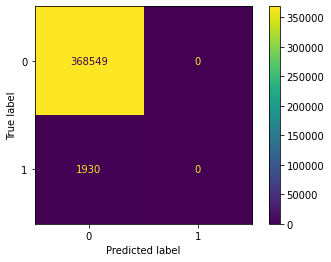

In [ ]:
print("Accuracy score:",accuracy_score(y_test_pca, lrc_pred_pca) * 100)
print("Precision score:",precision_score(y_test_pca, lrc_pred_pca))
print("Recall score:",metrics.recall_score(y_test_pca, lrc_pred_pca))
print(classification_report(y_test_pca, lrc_pred_pca))
print(ConfusionMatrixDisplay.from_predictions(y_test_pca, lrc_pred_pca))

***Results***: We are able to obtain a pretty good score of 99.47%. However, it is likely due to the highly imbalance dataset, creating high bias as a result since it is predicting the results as non-fraud.

Now lets try using the Random Under Sampling and re-run the tests.

***Random Under Sampling - PCA***

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
rus_x_pca, rus_y_pca = rus.fit_resample(X_train_pca, y_train_pca)

In [ ]:
lrc_rus_pca = LogisticRegression(random_state=42)
model_lrc_rus_pca = lrc_rus_pca.fit(rus_x_pca, rus_y_pca)

In [ ]:
lrc_pred_rus_pca = model_lrc_rus_pca.predict(rus_x_pca)

Accuracy score: 58.09480637223158
Precision score: 0.5882519062411748
Recall score: 0.539567413547468
              precision    recall  f1-score   support

           0       0.57      0.62      0.60      7721
           1       0.59      0.54      0.56      7721

    accuracy                           0.58     15442
   macro avg       0.58      0.58      0.58     15442
weighted avg       0.58      0.58      0.58     15442



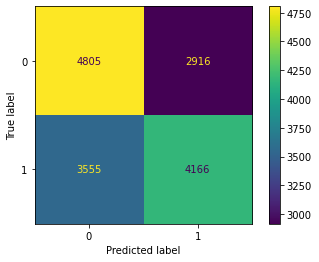

In [ ]:
print("Accuracy score:",accuracy_score(rus_y_pca, lrc_pred_rus_pca) * 100)
print("Precision score:",precision_score(rus_y_pca, lrc_pred_rus_pca))
print("Recall score:",metrics.recall_score(rus_y_pca, lrc_pred_rus_pca))
print(classification_report(rus_y_pca, lrc_pred_rus_pca))
print(ConfusionMatrixDisplay.from_predictions(rus_y_pca, lrc_pred_rus_pca))

***Results***: We can see that the accuracy score had dropped to 57% after we transformed the dataset. However the **Recall score had increased**, indicating that the bias had reduced, and the model is more able to more correctly predict the labels. However, we note that the accuracy can be improved further using tuning which will be further discussed on the model training/model hyperparameter tuning portions.

Lets try to run the PCA dataset using Decision Tree and compare the results

***Decision Tree - PCA***

Accuracy score: 100.0
Precision score: 1.0
Recall score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7721
           1       1.00      1.00      1.00      7721

    accuracy                           1.00     15442
   macro avg       1.00      1.00      1.00     15442
weighted avg       1.00      1.00      1.00     15442



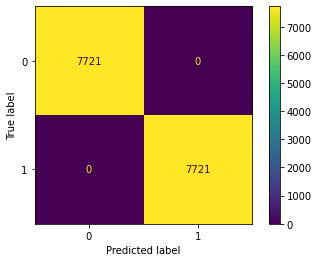

In [ ]:
dtc_rus_pca = DecisionTreeClassifier()
model_dtc_rus_pca = dtc_rus_pca.fit(rus_x_pca, rus_y_pca)

dtc_pred_rus_pca = model_dtc_rus_pca.predict(rus_x_pca)

print("Accuracy score:",accuracy_score(rus_y_pca, dtc_pred_rus_pca) * 100)
print("Precision score:",precision_score(rus_y_pca, dtc_pred_rus_pca))
print("Recall score:",metrics.recall_score(rus_y_pca, dtc_pred_rus_pca))
print(classification_report(rus_y_pca, dtc_pred_rus_pca))
print(ConfusionMatrixDisplay.from_predictions(rus_y_pca, dtc_pred_rus_pca))

***Results***: Here, we can see that the score when using Decision Tree is 100%! However, this is likely due to overfitting, which Decision Tree is proned to. 

Now that we have looked at Feature Extractions using PCA, lets try the Data Engineering without the PCA, and compare the results.

Similarly, we will use Logistic Regresison and Decision Tree for the purpose of comparision.

# **Feature Engineering - non PCA**

***Performing Train Test Split***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)     
print('X_train data size', X_train.shape)
print('y_train data size', y_train.shape)
print('X_test data size' , X_test.shape)
print('y_test data size' , y_test.shape)

X_train data size (1481915, 72)
y_train data size (1481915,)
X_test data size (370479, 72)
y_test data size (370479,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

Now that we have separated our training and testing dataset, let's try to run a sample of the modelling using Logistic Regression. Note that our dataset is still heavily imbalance. Let's see if the imbalance data has any impact on our results.


***Logistic Regression - before balancing***

In [ ]:
lrc = LogisticRegression(random_state=42)

In [ ]:
model_lrc = lrc.fit(X_train, y_train)
#takes about 20-30 seconds to run

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
lrc_pred = model_lrc.predict(X_test)

Accuracy score: 99.46555675220458
Precision score: 0.0
Recall score: 0.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



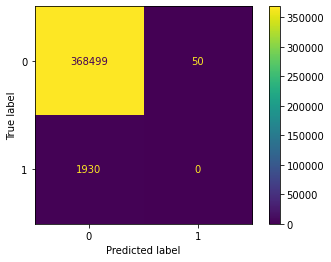

In [ ]:
print("Accuracy score:",accuracy_score(y_test, lrc_pred) * 100)
print("Precision score:",precision_score(y_test, lrc_pred))
print("Recall score:",metrics.recall_score(y_test, lrc_pred))
print(classification_report(y_test, lrc_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, lrc_pred))

***Results***: We are able to get a pretty high accuracy score of **99.47%** even though we have not balance the data yet.

This shows that our dataset is still highly imbalance, and may have created bias which the model is predicting at over 99% as non-fraud. Note that the precision and recall scores are very low too.

Now let's try **balancing** the data and then perform the test again to see if there are any differences.

**Data imbalance**

***Random Under Sampling***







In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
rus_x, rus_y = rus.fit_resample(X_train, y_train)

In [ ]:
rus_y.value_counts()

0    7721
1    7721
Name: is_fraud, dtype: int64

Now let's try using Logistic Regressor again on the balanced data and see if there are any difference.

***Logistic Regressor - after Random Under Sampling***

In [ ]:
lrc = LogisticRegression(random_state=42)
model_bal = lrc.fit(rus_x, rus_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
lrc_bal_pred = model_bal.predict(rus_x)

Accuracy score: 73.44255925398264
Precision score: 0.7515286270150083
Recall score: 0.7004274057764538
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7721
           1       0.75      0.70      0.73      7721

    accuracy                           0.73     15442
   macro avg       0.74      0.73      0.73     15442
weighted avg       0.74      0.73      0.73     15442



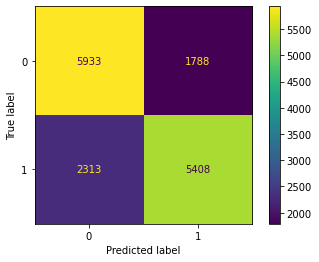

In [ ]:
print("Accuracy score:",accuracy_score(rus_y, lrc_bal_pred) * 100)
print("Precision score:",precision_score(rus_y, lrc_bal_pred))
print("Recall score:",metrics.recall_score(rus_y, lrc_bal_pred))
print(classification_report(rus_y, lrc_bal_pred))
print(ConfusionMatrixDisplay.from_predictions(rus_y, lrc_bal_pred))

***Results***: After performing logistic regressor on the balanced data, we can see that the accuracy score has dropped to **73.44%**. However, the precision and **recall have both increased**. This tells us that the model is more able to correctly predict the correct label.

In [ ]:
parameters = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters,scoring='accuracy',cv=5)
clf.fit(rus_x, rus_y)
clf.best_params_

#takes about 1-2 minutes to run

{'max_depth': 10, 'min_samples_split': 10}

Now lets try to use Decision Tree classifier and see if there any difference in the results vs the Logistic Regression.rus_x

***Decision Tree - after Random Under Sampling***

In [ ]:
dtc = DecisionTreeClassifier()
model_dtc = dtc.fit(rus_x, rus_y)

In [ ]:
dtc_pred = dtc.predict(rus_x)

Accuracy score: 100.0
Precision score: 1.0
Recall score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7721
           1       1.00      1.00      1.00      7721

    accuracy                           1.00     15442
   macro avg       1.00      1.00      1.00     15442
weighted avg       1.00      1.00      1.00     15442



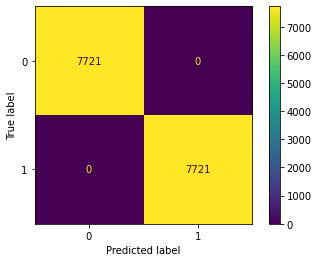

In [ ]:
print("Accuracy score:",accuracy_score(rus_y, dtc_pred) * 100)
print("Precision score:",precision_score(rus_y, dtc_pred))
print("Recall score:",metrics.recall_score(rus_y, dtc_pred))
print(classification_report(rus_y, dtc_pred))
print(ConfusionMatrixDisplay.from_predictions(rus_y, dtc_pred))

***Results***: Using Decision Tree on the balanced data, we are able to get a 100% score for recall and accuracy, which means that the model is able to correctly predict the labels. However, this could be due to overfitting as Decision Tree are proned to overfit the model. Hence, we may need to tune the model which we will further discuss under the Hyperparameter tuning portion.

Now that we have used Random under sampling for the imbalance datatset, lets try using the Random Over Sampling method, and then run some tests to see if there are any difference in the results.

***Random Over Sampling***

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

ros_x, ros_y = ros.fit_resample(X_train, y_train)


In [ ]:
print(ros_y.value_counts())


0    1474194
1    1474194
Name: is_fraud, dtype: int64


Now lets try using Logistic regression and see if there any difference for the balanced data from Random Over sampling.

***Logistic Regressor - after Random Over Sampling***

In [ ]:
lrc = LogisticRegression(random_state=42)
model_ros_bal = lrc.fit(ros_x, ros_y)
lrc_ros_bal_pred = model_ros_bal.predict(ros_x)
#takes about a minute to run

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy score: 81.70115330818061
Precision score: 0.867103626995916
Recall score: 0.7487854380088373
              precision    recall  f1-score   support

           0       0.78      0.89      0.83   1474194
           1       0.87      0.75      0.80   1474194

    accuracy                           0.82   2948388
   macro avg       0.82      0.82      0.82   2948388
weighted avg       0.82      0.82      0.82   2948388



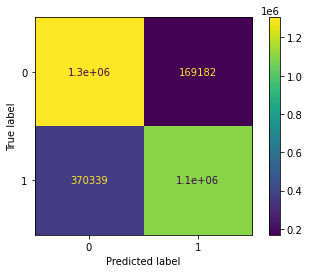

In [ ]:
print("Accuracy score:",accuracy_score(ros_y, lrc_ros_bal_pred) * 100)
print("Precision score:",precision_score(ros_y, lrc_ros_bal_pred))
print("Recall score:",metrics.recall_score(ros_y, lrc_ros_bal_pred))
print(classification_report(ros_y, lrc_ros_bal_pred))
print(ConfusionMatrixDisplay.from_predictions(ros_y, lrc_ros_bal_pred))

***Results***: Based on the Random Over sampling, the Logistic Regression is able to obtain a higher result (**81.70%**) as compared to using the data balanced via the Random Under sampling method (**73.44%**). The recall scores are also higher.

Now lets try using Decision Tree for the Random Over Sampling.

***Decision Tree - after Random Over Sampling***

In [ ]:
dtc_ros = DecisionTreeClassifier()
model_ros_bal = dtc_ros.fit(ros_x, ros_y)
dtc_ros_bal_pred = model_ros_bal.predict(ros_x)

#takes about 2 minutes to run

Accuracy score: 100.0
Precision score: 1.0
Recall score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       1.00      1.00      1.00   1474194

    accuracy                           1.00   2948388
   macro avg       1.00      1.00      1.00   2948388
weighted avg       1.00      1.00      1.00   2948388



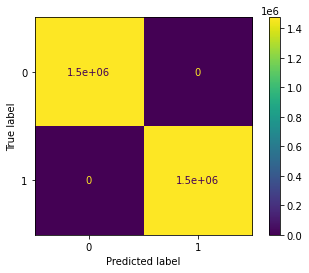

In [ ]:
print("Accuracy score:",accuracy_score(ros_y, dtc_ros_bal_pred) * 100)
print("Precision score:",precision_score(ros_y, dtc_ros_bal_pred))
print("Recall score:",metrics.recall_score(ros_y, dtc_ros_bal_pred))
print(classification_report(ros_y, dtc_ros_bal_pred))
print(ConfusionMatrixDisplay.from_predictions(ros_y, dtc_ros_bal_pred))

***Results***: The Decision Tree classifier is able to get the same result of 100% for the balanced data from Random Over sampling. However, this may indicate overfitting issue which we will address by regularization. 

Now that we have experiment with using both Random Under and Random Over sampling, lets try using the SMOTE sampling method and see if there are any difference in the results.

***Using SMOTE for imbalance dataset***

In [ ]:
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)



In [ ]:
print(y_train_smote.value_counts())


0    1474194
1    1474194
Name: is_fraud, dtype: int64


Lets try to run the Logistic Regression for the SMOTE dataset.

***Logistic Regression - after SMOTE***

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy score: 82.32264545914582
Precision score: 0.8713827093330756
Recall score: 0.7583927217177657
              precision    recall  f1-score   support

           0       0.79      0.89      0.83   1474194
           1       0.87      0.76      0.81   1474194

    accuracy                           0.82   2948388
   macro avg       0.83      0.82      0.82   2948388
weighted avg       0.83      0.82      0.82   2948388



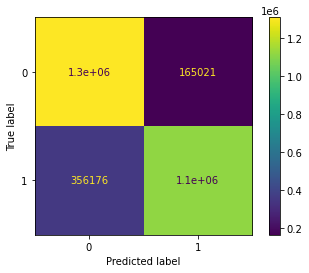

In [ ]:
lr_smote = LogisticRegression()
lr_smote_model = lr_smote.fit(X_train_smote, y_train_smote)

lr_smote_pred = lr_smote_model.predict(X_train_smote)

print("Accuracy score:",accuracy_score(y_train_smote, lr_smote_pred) * 100)
print("Precision score:",precision_score(y_train_smote, lr_smote_pred))
print("Recall score:",metrics.recall_score(y_train_smote, lr_smote_pred))
print(classification_report(y_train_smote, lr_smote_pred))
print(ConfusionMatrixDisplay.from_predictions(y_train_smote, lr_smote_pred))
#takes about 1-2 minute to run

***Results***: Using SMOTE, we are able to obtain a accuracy score of **82.32%**, which is slightly higher than the data resample done via Random Over sampling **(81.70%)**. 

We will use the dataset with resampling done via SMOTE to proceed with the modelling. 

# **Model Training**

In [ ]:
#Train our model

In [ ]:
def ml_model(X_train,X_test, Y_train, Y_test):
  MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  
ml_model(X_train,X_test, Y_train, Y_test)

In [ ]:
#Feature Selections

from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,target,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

Feature Selections

In [ ]:
#Fisher's Score for Feature Selection
from skfeature.function.similarity_based import fisher_score

scores = fisher_score.fisher_score(X, Y)

feature_importances = pd.Series(scores, data.columns[0:len(data.columns)-1])
feature_importances.plot(kind='barh', color = 'orange')
plt.show()

In [ ]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)

clf.fit(rus_x, rus_y)


RandomForestClassifier(n_estimators=200)

In [ ]:
ft = clf.feature_importances_

In [ ]:
df = pd.data({"Features": pd.data(X).columns, "Importances":importances})
df.set_index('Importances')

df = df.sort_values('Importances')
df.plot.bar(color = 'orange')

# **Tuning the Model**